In [61]:
# Importando bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def transform_to_RGB(img_array):
    return img_array.reshape(len(img_array), 3,32,32).transpose([0, 2, 3, 1])

def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [71]:
# Definindo número de épocas
epochs = 10
batch_size = 128
# Definindo tamanho das imagens
channels, img_rows, img_cols = 3, 32, 32
img_shape = (channels, img_rows, img_cols)
input_shape = img_shape

### CIFAR-10 dataset ###

# Carregando imagens
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

learning_rate = 0.001
# Definindo informações das classes
num_classes = 10
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

train_images = normalize(train_images)
test_images = normalize(test_images)

<IPython.core.display.Javascript object>


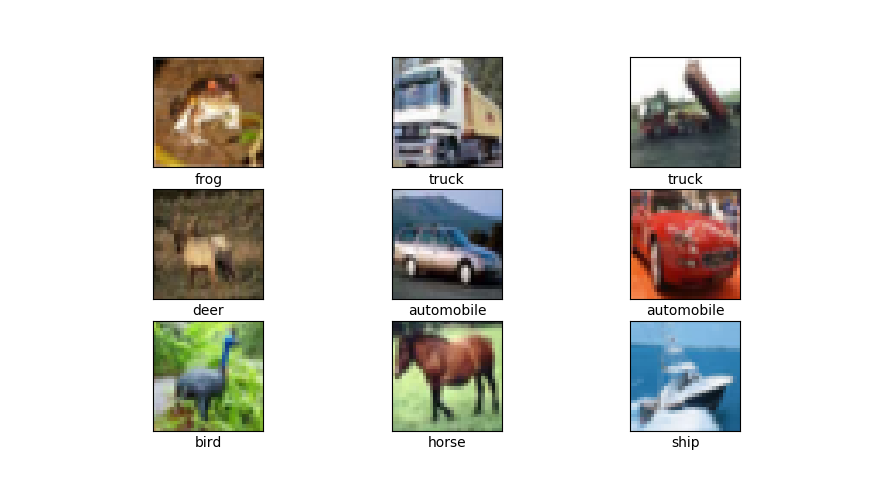

In [65]:
plt.figure(figsize=(3,3))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])

In [80]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3) ),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_128 (Bat (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_129 (Bat (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 6, 6, 256)         0         
__________

In [81]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])


checkpoint = keras.callbacks.ModelCheckpoint("model.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Epoch 1/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.5605 - acc: 0.4532
Epoch 00001: loss improved from inf to 1.55965, saving model to model.h5
50000/50000 [==============================] - 94s 2ms/step - loss: 1.5596 - acc: 0.4535
Epoch 2/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.9847 - acc: 0.6549
Epoch 00002: loss improved from 1.55965 to 0.98463, saving model to model.h5
50000/50000 [==============================] - 84s 2ms/step - loss: 0.9846 - acc: 0.6550
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.7643 - acc: 0.7379
Epoch 00003: loss improved from 0.98463 to 0.76434, saving model to model.h5
50000/50000 [==============================] - 84s 2ms/step - loss: 0.7643 - acc: 0.7378
Epoch 4/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.6059 - acc: 0.7940
Epoch 00004: loss improved from 0.76434 to 0.60608, saving model to model.h5
50000/50000 [==============================] - 84